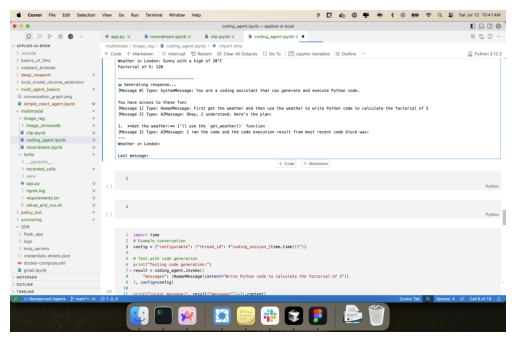

In [1]:
sample_image_path = "image_rag/screenshot.png"
from PIL import Image
import matplotlib.pyplot as plt

# Open and display the image
img = Image.open(sample_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [2]:
# Display image metrics: dimensions, mode, and file size

# Get image dimensions
width, height = img.size

# Get image mode (e.g., RGB, RGBA, L)
mode = img.mode

# Get file size in bytes and KB
import os
file_size_bytes = os.path.getsize(sample_image_path)
file_size_kb = file_size_bytes / 1024

print(f"Image dimensions: {width} x {height} pixels")
print(f"Image mode: {mode}")
print(f"File size: {file_size_bytes} bytes ({file_size_kb:.2f} KB)")


Image dimensions: 3024 x 1964 pixels
Image mode: RGBA
File size: 1091415 bytes (1065.83 KB)


In [3]:
import base64
import os

def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')


image_data = encode_image_to_base64(sample_image_path)

# Prepare the message as a list (dictionary format)
message = {
    "role": "user",
    "content": [
        
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
        },
        {
            "type": "text",
            "text": "Describe the image in detail"
        },
    ],
}

# If your LLM client expects a list of messages:
messages = [message]

# Example: sending to an LLM client that accepts list-of-dict messages
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(
    model="anthropic/claude-sonnet-4",
    openai_api_base="https://openrouter.ai/api/v1",
    openai_api_key=os.environ["OPENROUTER_API_KEY"],
)

response = llm.invoke(messages)
print(response.content)


/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/ipykernel_39945/3079621704.py:33: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


This image shows a Jupyter notebook interface running in what appears to be VS Code or a similar IDE on macOS. The notebook is titled "coding_agent.ipynb" and appears to be part of an AI/ML project called "APPLIED-AI-BOOK".

The main content shows a conversation or interaction log with an AI coding assistant. The visible text includes:

- Weather information: "Weather in London: Sunny with a high of 20°C"
- "Factorial of 5: 120"
- A system message indicating the AI is a coding assistant that can generate and execute Python code
- Several message exchanges discussing getting weather data and calculating factorials
- References to using a `get_weather()` function

Below this conversation log are code cells showing Python imports and configuration:
- `import time` 
- Example conversation setup
- Configuration with thread_id and session timing
- Test code for code generation functionality
- A result variable being set up to invoke a coding agent

The left sidebar shows the project file str

In [4]:
import time
import pandas as pd
from PIL import Image
import io
import base64
import os

def compress_and_resize_image(original_img, quality=85, max_size=None):
    """Compress and optionally resize an image"""
    img_copy = original_img.copy()
    
    # Resize if max_size is specified
    if max_size:
        img_copy.thumbnail(max_size, Image.Resampling.LANCZOS)
    
    # Convert RGBA to RGB if saving as JPEG
    if img_copy.mode == 'RGBA':
        rgb_img = Image.new('RGB', img_copy.size, (255, 255, 255))
        rgb_img.paste(img_copy, mask=img_copy.split()[-1])
        img_copy = rgb_img
    
    # Save to bytes with compression
    buffer = io.BytesIO()
    img_copy.save(buffer, format='JPEG', quality=quality, optimize=True)
    buffer.seek(0)
    
    return img_copy, buffer.getvalue()

def time_base64_encoding(image_bytes):
    """Time how long it takes to encode image to base64"""
    start_time = time.time()
    encoded = base64.b64encode(image_bytes).decode('utf-8')
    end_time = time.time()
    return end_time - start_time, len(encoded)

# Get original image dimensions for dynamic scaling
original_width, original_height = img.size

# Test different compression levels and sizes (maintaining aspect ratio)
test_configs = [
    {"quality": 95, "max_size": None, "description": "Original size, high quality"},
    {"quality": 85, "max_size": None, "description": "Original size, medium quality"},
    {"quality": 50, "max_size": None, "description": "Original size, low quality"},
    {"quality": 85, "max_size": (int(original_width * 0.75), int(original_height * 0.75)), "description": "75% size, medium quality"},
    {"quality": 85, "max_size": (int(original_width * 0.5), int(original_height * 0.5)), "description": "50% size, medium quality"},
    {"quality": 85, "max_size": (int(original_width * 0.25), int(original_height * 0.25)), "description": "25% size, medium quality"},
    {"quality": 50, "max_size": (int(original_width * 0.25), int(original_height * 0.25)), "description": "25% size, low quality"},
]

results = []

print("Testing image compression and encoding performance...\n")

for config in test_configs:
    print(f"Processing: {config['description']}")
    
    # Compress and resize
    start_time = time.time()
    processed_img, image_bytes = compress_and_resize_image(
        img, 
        quality=config['quality'], 
        max_size=config['max_size']
    )
    compression_time = time.time() - start_time
    
    # Time base64 encoding
    encoding_time, encoded_length = time_base64_encoding(image_bytes)
    
    # Calculate metrics
    file_size_kb = len(image_bytes) / 1024
    width, height = processed_img.size
    compression_ratio = (len(image_bytes) / file_size_bytes) * 100
    
    result = {
        'description': config['description'],
        'width': width,
        'height': height,
        'quality': config['quality'],
        'file_size_kb': round(file_size_kb, 2),
        'compression_ratio_%': round(compression_ratio, 1),
        'compression_time_ms': round(compression_time * 1000, 2),
        'encoding_time_ms': round(encoding_time * 1000, 2),
        'total_time_ms': round((compression_time + encoding_time) * 1000, 2),
        'encoded_length': encoded_length
    }
    
    results.append(result)
    
    print(f"  Size: {width}x{height}, File: {file_size_kb:.1f}KB, "
          f"Total time: {result['total_time_ms']:.1f}ms")

# Create DataFrame for easy analysis
df = pd.DataFrame(results)
print(f"\n{'='*80}")
print("COMPRESSION PERFORMANCE SUMMARY")
print(f"{'='*80}")
print(df.to_string(index=False))

# Show size reduction benefits
print(f"\n{'='*50}")
print("SIZE REDUCTION ANALYSIS")
print(f"{'='*50}")
print(f"Original file size: {file_size_kb:.1f} KB")
print(f"Best compression: {df['file_size_kb'].min():.1f} KB "
      f"({df['compression_ratio_%'].min():.1f}% of original)")
print(f"Fastest processing: {df['total_time_ms'].min():.1f}ms "
      f"({df.loc[df['total_time_ms'].idxmin(), 'description']})")


Testing image compression and encoding performance...

Processing: Original size, high quality
  Size: 3024x1964, File: 695.7KB, Total time: 62.3ms
Processing: Original size, medium quality
  Size: 3024x1964, File: 463.4KB, Total time: 55.5ms
Processing: Original size, low quality
  Size: 3024x1964, File: 273.9KB, Total time: 52.6ms
Processing: 75% size, medium quality
  Size: 2268x1473, File: 320.4KB, Total time: 142.9ms
Processing: 50% size, medium quality
  Size: 1512x982, File: 186.2KB, Total time: 105.7ms
Processing: 25% size, medium quality
  Size: 756x491, File: 63.1KB, Total time: 54.9ms
Processing: 25% size, low quality
  Size: 756x491, File: 34.0KB, Total time: 53.5ms

COMPRESSION PERFORMANCE SUMMARY
                  description  width  height  quality  file_size_kb  compression_ratio_%  compression_time_ms  encoding_time_ms  total_time_ms  encoded_length
  Original size, high quality   3024    1964       95        695.68                 65.3                60.85            

In [5]:
# Test LLM API call timing with different image sizes, running each option k times and reporting mean, median, p95
import matplotlib.pyplot as plt
import numpy as np
import requests

# Omni parser API endpoint
agenti_omni_url = "https://agenti-omni.ngrok.app"

def fetch_prediction_output(image_base64: str):
    """Call the Omni parser API with base64 image data"""
    try:
        response = requests.post(
            f"{agenti_omni_url}/api/parse",
            json={"image": image_base64},
            timeout=10,
        )
        if response.status_code == 200:
            return response.json()
    except Exception as e:
        return None

def test_llm_timing_with_compression(image_bytes, description):
    """Test timing for LLM API call and omni parsing with compressed image"""
    # Encode to base64
    start_encode = time.time()
    image_data = base64.b64encode(image_bytes).decode('utf-8')
    encode_time = time.time() - start_encode

    # Prepare LLM message
    message = {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
            },
            {
                "type": "text", 
                "text": "I just need a single word answer please: is this a screenshot of a computer or a phone? Just yes or no."
            },
        ],
    }

    # Call LLM and time the response
    start_llm = time.time()
    try:
        response = llm.invoke([message])
        llm_time = time.time() - start_llm
        llm_success = True
        response_length = len(response.content)
    except Exception as e:
        llm_time = 0
        llm_success = False
        response_length = 0
        print(f"  LLM Error with {description}: {e}")

    # Call Omni parser and time the response
    start_omni = time.time()
    try:
        omni_result = fetch_prediction_output(image_data)
        omni_time = time.time() - start_omni
        if omni_result and 'latency' in omni_result:
            omni_success = True
            omni_latency_reported = omni_result.get('latency', 0)
            omni_elements_count = len(omni_result.get('elements', []))
        else:
            omni_success = False
            omni_latency_reported = 0
            omni_elements_count = 0
    except Exception as e:
        omni_time = 0
        omni_success = False
        omni_latency_reported = 0
        omni_elements_count = 0
        print(f"  Omni Error with {description}: {e}")

    return {
        'encoding_time': encode_time,
        'llm_time': llm_time,
        'llm_success': llm_success,
        'response_length': response_length,
        'omni_time': omni_time,
        'omni_success': omni_success,
        'omni_latency_reported': omni_latency_reported,
        'omni_elements_count': omni_elements_count,
        'total_time': encode_time + llm_time + omni_time,
        'image_size_kb': len(image_bytes) / 1024
    }

def summarize_timings(timings, key):
    arr = np.array(timings)
    return {
        'mean': float(np.mean(arr)),
        'median': float(np.median(arr)),
        'p95': float(np.percentile(arr, 95))
    }


def run_llm_benchmark(configs, k=3):
    print("Testing LLM + Omni parsing timing with different image compressions...")
    print(f"(Each config will be run {k} times; this will make actual API calls)\n")

    llm_results = []

    for config in configs:
        print(f"Testing {config['description']}...")
        encoding_times = []
        llm_times = []
        omni_times = []
        omni_latency_reported = []
        omni_elements_counts = []
        total_times = []
        response_lengths = []
        image_size_kb = None
        llm_success_count = 0
        omni_success_count = 0

        for i in range(k):
            # Process image
            processed_img, image_bytes = compress_and_resize_image(
                img, 
                quality=config['quality'], 
                max_size=config['max_size']
            )
            # Test LLM + Omni timing
            timing_result = test_llm_timing_with_compression(image_bytes, config['description'])
            
            # Collect data if any part succeeded
            encoding_times.append(timing_result['encoding_time'] * 1000)
            total_times.append(timing_result['total_time'] * 1000)
            image_size_kb = timing_result['image_size_kb']
            
            # LLM-specific data
            if timing_result['llm_success']:
                llm_times.append(timing_result['llm_time'] * 1000)
                response_lengths.append(timing_result['response_length'])
                llm_success_count += 1
            
            # Omni-specific data
            if timing_result['omni_success']:
                omni_times.append(timing_result['omni_time'] * 1000)
                omni_latency_reported.append(timing_result['omni_latency_reported'])
                omni_elements_counts.append(timing_result['omni_elements_count'])
                omni_success_count += 1
            
            # Status reporting
            llm_status = "✅" if timing_result['llm_success'] else "❌"
            omni_status = "✅" if timing_result['omni_success'] else "❌"
            print(f"    Run {i+1}/{k}: LLM {llm_status}, Omni {omni_status} | Total: {timing_result['total_time']*1000:.0f}ms")

        # Build result if we have any successful runs
        if llm_success_count > 0 or omni_success_count > 0:
            result = {
                'description': config['description'],
                'image_size_kb': image_size_kb,
                'encoding_time_ms_mean': np.mean(encoding_times),
                'encoding_time_ms_median': np.median(encoding_times),
                'encoding_time_ms_p95': np.percentile(encoding_times, 95),
                'total_time_ms_mean': np.mean(total_times),
                'total_time_ms_median': np.median(total_times),
                'total_time_ms_p95': np.percentile(total_times, 95),
                'llm_success_runs': llm_success_count,
                'omni_success_runs': omni_success_count,
            }
            
            # Add LLM stats if we have successful runs
            if llm_success_count > 0:
                result.update({
                    'llm_response_time_ms_mean': np.mean(llm_times),
                    'llm_response_time_ms_median': np.median(llm_times),
                    'llm_response_time_ms_p95': np.percentile(llm_times, 95),
                    'response_length_mean': np.mean(response_lengths),
                })
            else:
                result.update({
                    'llm_response_time_ms_mean': 0,
                    'llm_response_time_ms_median': 0,
                    'llm_response_time_ms_p95': 0,
                    'response_length_mean': 0,
                })
            
            # Add Omni stats if we have successful runs
            if omni_success_count > 0:
                result.update({
                    'omni_time_ms_mean': np.mean(omni_times),
                    'omni_time_ms_median': np.median(omni_times),
                    'omni_time_ms_p95': np.percentile(omni_times, 95),
                    'omni_latency_reported_mean': np.mean(omni_latency_reported),
                    'omni_elements_count_mean': np.mean(omni_elements_counts),
                    'omni_elements_count_median': np.median(omni_elements_counts),
                })
            else:
                result.update({
                    'omni_time_ms_mean': 0,
                    'omni_time_ms_median': 0,
                    'omni_time_ms_p95': 0,
                    'omni_latency_reported_mean': 0,
                    'omni_elements_count_mean': 0,
                    'omni_elements_count_median': 0,
                })
            
            llm_results.append(result)
        else:
            print(f"  ❌ All runs failed for {config['description']}")

    return llm_results

In [6]:
# Test a subset of configurations for LLM timing (to avoid too many API calls)
llm_test_configs = [
    {"quality": 100, "max_size": None, "description": "Original size"},
    {"quality": 85, "max_size": None, "description": "Quality 85%"},
    {"quality": 85, "max_size": (int(original_width * 0.5), int(original_height * 0.5)), "description": "Quality 85% + 50% size"},  
    {"quality": 85, "max_size": (int(original_width * 0.25), int(original_height * 0.25)), "description": "Quality 85% + 25% size"},
    {"quality": 50, "max_size": (int(original_width * 0.25), int(original_height * 0.25)), "description": "Quality 50% + 25% size"},
]

llm_results = run_llm_benchmark(llm_test_configs, k=3)


Testing LLM + Omni parsing timing with different image compressions...
(Each config will be run 3 times; this will make actual API calls)

Testing Original size...
    Run 1/3: LLM ✅, Omni ✅ | Total: 8823ms
    Run 2/3: LLM ✅, Omni ✅ | Total: 8287ms
    Run 3/3: LLM ✅, Omni ✅ | Total: 9042ms
Testing Quality 85%...
    Run 1/3: LLM ✅, Omni ✅ | Total: 12178ms
    Run 2/3: LLM ✅, Omni ✅ | Total: 8283ms
    Run 3/3: LLM ✅, Omni ✅ | Total: 8643ms
Testing Quality 85% + 50% size...
    Run 1/3: LLM ✅, Omni ✅ | Total: 6543ms
    Run 2/3: LLM ✅, Omni ✅ | Total: 6328ms
    Run 3/3: LLM ✅, Omni ✅ | Total: 6585ms
Testing Quality 85% + 25% size...
    Run 1/3: LLM ✅, Omni ✅ | Total: 5129ms
    Run 2/3: LLM ✅, Omni ✅ | Total: 5720ms
    Run 3/3: LLM ✅, Omni ✅ | Total: 5376ms
Testing Quality 50% + 25% size...
    Run 1/3: LLM ✅, Omni ✅ | Total: 5526ms
    Run 2/3: LLM ✅, Omni ✅ | Total: 5123ms
    Run 3/3: LLM ✅, Omni ✅ | Total: 5115ms



LLM + OMNI PARSING TIMING RESULTS (mean/median/p95 over k runs)
           description  image_size_kb  llm_success_runs  omni_success_runs  llm_response_time_ms_median  omni_time_ms_median  total_time_ms_median  omni_elements_count_median  omni_latency_reported_mean
         Original size         1150.7                 3                  3                       2084.4               6321.2                8822.8                       240.0                         5.5
           Quality 85%          463.4                 3                  3                       2049.6               6592.2                8642.6                       238.0                         5.7
Quality 85% + 50% size          186.2                 3                  3                       1777.2               4604.8                6542.8                       212.0                         4.1
Quality 85% + 25% size           63.1                 3                  3                       1659.8               3716.

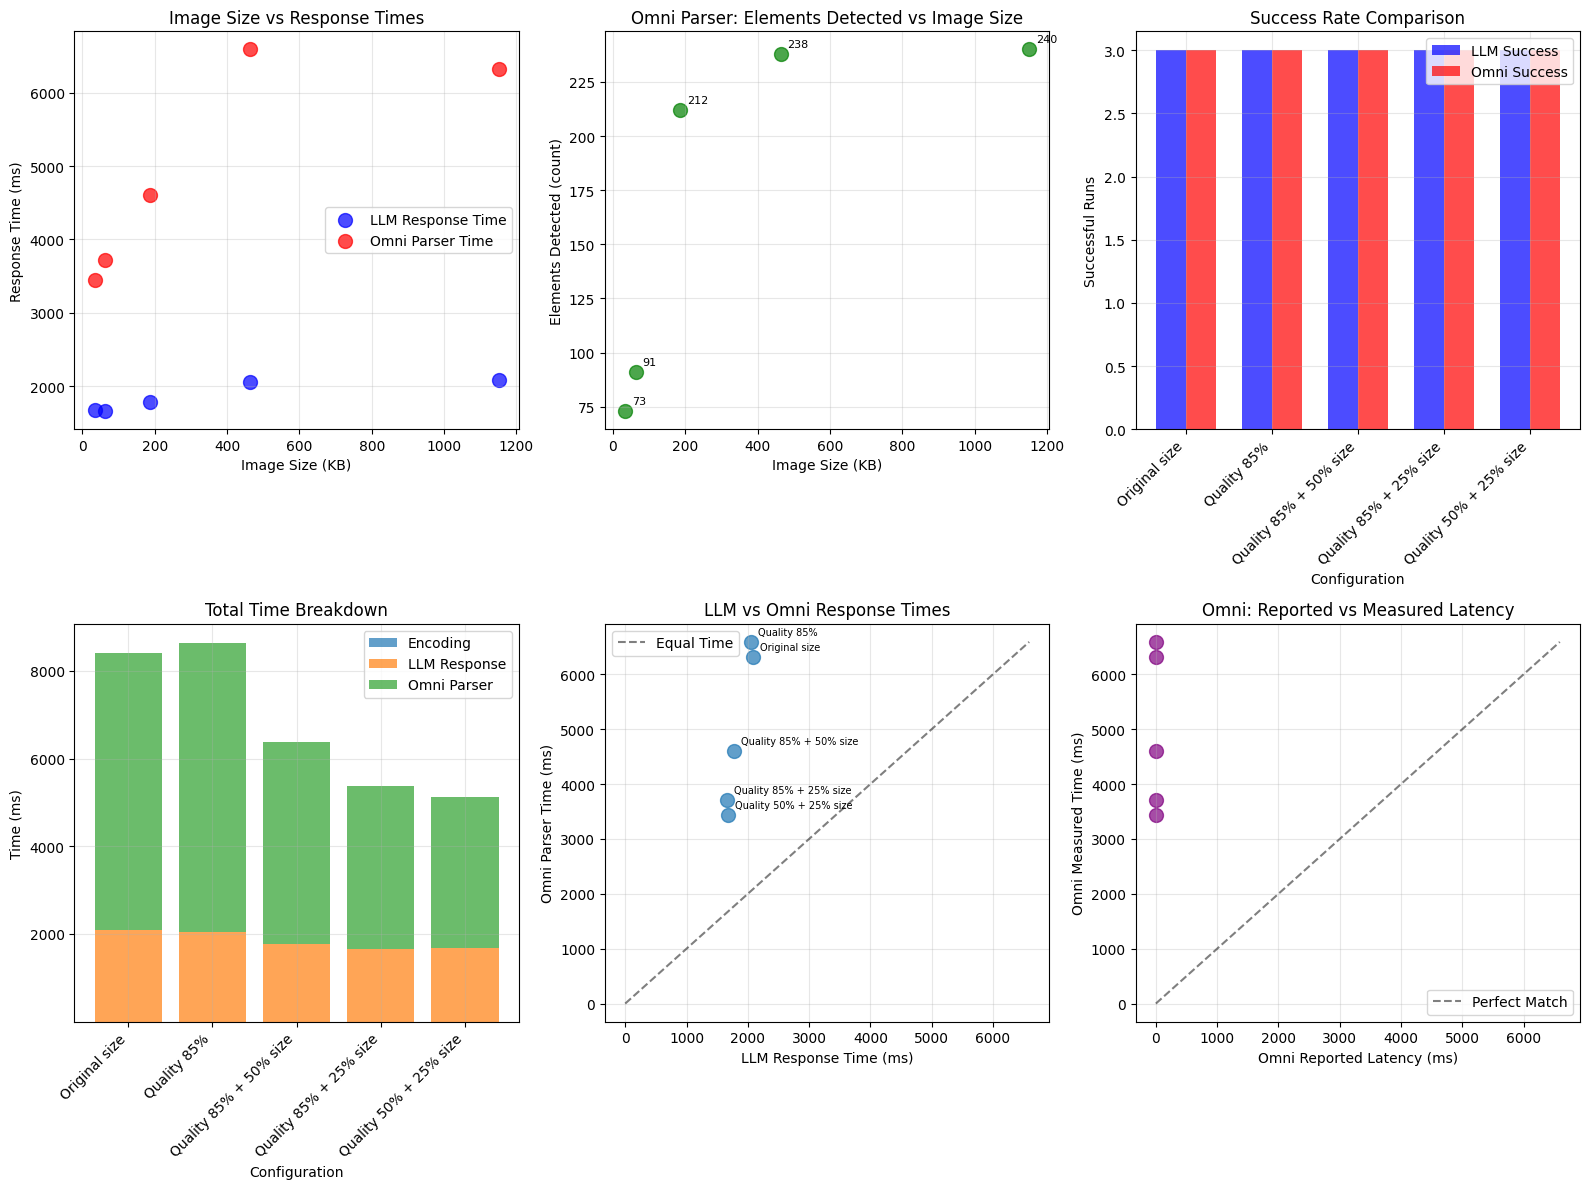


KEY INSIGHTS
🚀 Fastest overall: Quality 50% + 25% size (5255ms mean)
📦 Smallest file: Quality 50% + 25% size (34.0KB)
🔬 Average LLM time: 1849ms
🔍 Average Omni time: 4936ms
⚡ LLM is 0.4x faster on average
🎯 Element detection range: 73 - 240 elements
📊 Best element detection: Original size (240 elements)
💾 Max size reduction: 97.0%
⚡ Max time reduction: 45.8%
✅ LLM success rate: 100.0%
✅ Omni success rate: 100.0%


In [7]:
# Create DataFrame and visualize results
llm_df = pd.DataFrame(llm_results)

if len(llm_df) > 0:
    print(f"\n{'='*80}")
    print("LLM + OMNI PARSING TIMING RESULTS (mean/median/p95 over k runs)")
    print(f"{'='*80}")
    
    # Display key columns
    display_cols = [
        'description', 'image_size_kb', 'llm_success_runs', 'omni_success_runs',
        'llm_response_time_ms_median', 'omni_time_ms_median', 'total_time_ms_median',
        'omni_elements_count_median', 'omni_latency_reported_mean'
    ]
    available_cols = [col for col in display_cols if col in llm_df.columns]
    print(llm_df[available_cols].to_string(index=False, float_format="%.1f"))

    # Create comprehensive visualization
    fig = plt.figure(figsize=(16, 12))
    
    # Plot 1: Image Size vs Processing Times (LLM vs Omni)
    ax1 = plt.subplot(2, 3, 1)
    if 'llm_response_time_ms_median' in llm_df.columns:
        ax1.scatter(llm_df['image_size_kb'], llm_df['llm_response_time_ms_median'], 
                   s=100, alpha=0.7, label='LLM Response Time', color='blue')
    if 'omni_time_ms_median' in llm_df.columns:
        ax1.scatter(llm_df['image_size_kb'], llm_df['omni_time_ms_median'], 
                   s=100, alpha=0.7, label='Omni Parser Time', color='red')
    ax1.set_xlabel('Image Size (KB)')
    ax1.set_ylabel('Response Time (ms)')
    ax1.set_title('Image Size vs Response Times')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Omni Elements Count vs Image Size
    ax2 = plt.subplot(2, 3, 2)
    if 'omni_elements_count_median' in llm_df.columns:
        ax2.scatter(llm_df['image_size_kb'], llm_df['omni_elements_count_median'], 
                   s=100, alpha=0.7, color='green')
        for idx, row in llm_df.iterrows():
            if 'omni_elements_count_median' in row and not pd.isna(row['omni_elements_count_median']):
                ax2.annotate(f"{row['omni_elements_count_median']:.0f}", 
                           (row['image_size_kb'], row['omni_elements_count_median']),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
    ax2.set_xlabel('Image Size (KB)')
    ax2.set_ylabel('Elements Detected (count)')
    ax2.set_title('Omni Parser: Elements Detected vs Image Size')
    ax2.grid(True, alpha=0.3)

    # Plot 3: Success Rate Comparison
    ax3 = plt.subplot(2, 3, 3)
    x_pos = range(len(llm_df))
    if 'llm_success_runs' in llm_df.columns and 'omni_success_runs' in llm_df.columns:
        width = 0.35
        ax3.bar([p - width/2 for p in x_pos], llm_df['llm_success_runs'], 
               width, label='LLM Success', alpha=0.7, color='blue')
        ax3.bar([p + width/2 for p in x_pos], llm_df['omni_success_runs'], 
               width, label='Omni Success', alpha=0.7, color='red')
    ax3.set_xlabel('Configuration')
    ax3.set_ylabel('Successful Runs')
    ax3.set_title('Success Rate Comparison')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([desc.split(',')[0] for desc in llm_df['description']], 
                       rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Total Time Breakdown
    ax4 = plt.subplot(2, 3, 4)
    if all(col in llm_df.columns for col in ['encoding_time_ms_median', 'llm_response_time_ms_median', 'omni_time_ms_median']):
        bottom1 = llm_df['encoding_time_ms_median']
        bottom2 = bottom1 + llm_df['llm_response_time_ms_median']
        
        ax4.bar(x_pos, llm_df['encoding_time_ms_median'], label='Encoding', alpha=0.7)
        ax4.bar(x_pos, llm_df['llm_response_time_ms_median'], 
               bottom=bottom1, label='LLM Response', alpha=0.7)
        ax4.bar(x_pos, llm_df['omni_time_ms_median'], 
               bottom=bottom2, label='Omni Parser', alpha=0.7)
    ax4.set_xlabel('Configuration')
    ax4.set_ylabel('Time (ms)')
    ax4.set_title('Total Time Breakdown')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels([desc.split(',')[0] for desc in llm_df['description']], 
                       rotation=45, ha='right')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Plot 5: LLM vs Omni Latency Comparison
    ax5 = plt.subplot(2, 3, 5)
    if 'llm_response_time_ms_median' in llm_df.columns and 'omni_time_ms_median' in llm_df.columns:
        ax5.scatter(llm_df['llm_response_time_ms_median'], llm_df['omni_time_ms_median'], 
                   s=100, alpha=0.7)
        # Add diagonal line for reference
        max_val = max(llm_df['llm_response_time_ms_median'].max(), llm_df['omni_time_ms_median'].max())
        ax5.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Equal Time')
        for idx, row in llm_df.iterrows():
            ax5.annotate(row['description'].split(',')[0], 
                       (row['llm_response_time_ms_median'], row['omni_time_ms_median']),
                       xytext=(5, 5), textcoords='offset points', fontsize=7)
    ax5.set_xlabel('LLM Response Time (ms)')
    ax5.set_ylabel('Omni Parser Time (ms)')
    ax5.set_title('LLM vs Omni Response Times')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # Plot 6: Omni Latency: Reported vs Measured
    ax6 = plt.subplot(2, 3, 6)
    if 'omni_latency_reported_mean' in llm_df.columns and 'omni_time_ms_median' in llm_df.columns:
        ax6.scatter(llm_df['omni_latency_reported_mean'], llm_df['omni_time_ms_median'], 
                   s=100, alpha=0.7, color='purple')
        # Add diagonal line for reference
        max_val = max(llm_df['omni_latency_reported_mean'].max(), llm_df['omni_time_ms_median'].max())
        ax6.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Perfect Match')
    ax6.set_xlabel('Omni Reported Latency (ms)')
    ax6.set_ylabel('Omni Measured Time (ms)')
    ax6.set_title('Omni: Reported vs Measured Latency')
    ax6.legend()
    ax6.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Enhanced Summary insights
    print(f"\n{'='*50}")
    print("KEY INSIGHTS")
    print(f"{'='*50}")

    if len(llm_df) > 1:
        # Overall performance
        fastest_idx = llm_df['total_time_ms_mean'].idxmin()
        fastest = llm_df.loc[fastest_idx]
        smallest_idx = llm_df['image_size_kb'].idxmin()
        smallest = llm_df.loc[smallest_idx]

        print(f"🚀 Fastest overall: {fastest['description']} ({fastest['total_time_ms_mean']:.0f}ms mean)")
        print(f"📦 Smallest file: {smallest['description']} ({smallest['image_size_kb']:.1f}KB)")
        
        # LLM vs Omni performance comparison
        if 'llm_response_time_ms_median' in llm_df.columns and 'omni_time_ms_median' in llm_df.columns:
            avg_llm_time = llm_df['llm_response_time_ms_median'].mean()
            avg_omni_time = llm_df['omni_time_ms_median'].mean()
            print(f"🔬 Average LLM time: {avg_llm_time:.0f}ms")
            print(f"🔍 Average Omni time: {avg_omni_time:.0f}ms")
            
            if avg_omni_time > 0:
                speed_ratio = avg_llm_time / avg_omni_time
                faster_service = "Omni" if speed_ratio > 1 else "LLM"
                print(f"⚡ {faster_service} is {abs(speed_ratio):.1f}x faster on average")
        
        # Element detection insights
        if 'omni_elements_count_median' in llm_df.columns:
            max_elements = llm_df['omni_elements_count_median'].max()
            min_elements = llm_df['omni_elements_count_median'].min()
            print(f"🎯 Element detection range: {min_elements:.0f} - {max_elements:.0f} elements")
            
            # Check if compression affects element detection
            if max_elements > min_elements:
                high_elements_row = llm_df.loc[llm_df['omni_elements_count_median'].idxmax()]
                print(f"📊 Best element detection: {high_elements_row['description']} ({max_elements:.0f} elements)")

        # Size and time reduction potential
        original_size = llm_df['image_size_kb'].max()
        min_size = llm_df['image_size_kb'].min()
        size_reduction = ((original_size - min_size) / original_size) * 100

        original_time = llm_df['total_time_ms_mean'].max()
        min_time = llm_df['total_time_ms_mean'].min()
        time_reduction = ((original_time - min_time) / original_time) * 100

        print(f"💾 Max size reduction: {size_reduction:.1f}%")
        print(f"⚡ Max time reduction: {time_reduction:.1f}%")
        
        # Success rate analysis
        if 'llm_success_runs' in llm_df.columns and 'omni_success_runs' in llm_df.columns:
            llm_success_rate = (llm_df['llm_success_runs'].sum() / (len(llm_df) * 3)) * 100  # assuming k=3
            omni_success_rate = (llm_df['omni_success_runs'].sum() / (len(llm_df) * 3)) * 100
            print(f"✅ LLM success rate: {llm_success_rate:.1f}%")
            print(f"✅ Omni success rate: {omni_success_rate:.1f}%")
            
else:
    print("❌ No successful runs to analyze")


In [8]:
import requests

agenti_omni_url="https://agenti-omni.ngrok.app"

def fetch_prediction_output(image_base64: str):
    # First try the ngrok endpoint with the actual image data
    try:
        response = requests.post(
            f"{agenti_omni_url}/api/parse",
            json={"image": image_base64},
            timeout=10,
        )
        if response.status_code == 200:
            return response.json()
    except Exception as e:
        return None




pred_output = fetch_prediction_output(base64.b64encode(image_bytes).decode('utf-8'))

pred_output['latency'], pred_output['image_info'], len(pred_output['elements']), pred_output['elements'][0]

(3.0240025520324707,
 {'width': 756, 'height': 491, 'format': 'JPEG'},
 73,
 {'type': 'text',
  'bbox': [0.9431216716766357,
   0.04276985675096512,
   0.9933862686157227,
   0.07128309458494186],
  'interactivity': False,
  'content': '@ @ 0',
  'source': 'box_ocr_content_ocr'})